# Importing the Libraries

In [1]:
import pandas as pd

# Importing the Dataset

In [2]:
data=pd.read_csv("heart.csv")

# Take care of Missing Values

In [3]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()
# since all the values are zero. we do not have any missing values in this dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Take care of Duplicate Values

In [7]:
data_dup=data.duplicated().any()

In [10]:
data_dup
# yes, our dataset contains duplicate data

True

In [5]:
data=data.drop_duplicates()

In [6]:
data_dup=data.duplicated().any()

In [7]:
data_dup
# All the duplicated values have been removed

False

# Data Processing

In [17]:
# seaparate columns with categorical values and continuous values
cate_val=[]
cont_val=[]

# if unique values are less than or equal to 10 then, it is categorical 
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [20]:
cate_val
# These are our categorical columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
cont_val
# These are our numerical columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding Categorical data

In [22]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
data["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

Because of these binary vectors one problem called dummy variable trap is created.
Dummy Variable trap is a scenario in which the independent variables are highly correlated.
In simple terms, one variable can be predicted from others so we will drop the first column.

In [24]:
# Already binary so no encoding required
cate_val.remove("sex")
cate_val.remove("target")

In [26]:
data=pd.get_dummies(data, columns=cate_val, drop_first=True)

In [27]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Scaling

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Do we require feature scaling for encoded columns?
NO, they are already in same range

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting the Dataset into the Training Set and Test set

In [35]:
x=data.drop("target", axis=1)

In [36]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
y=data["target"]

In [39]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
# 20% data for testing

In [42]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [44]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [47]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# Logistic Regression

In [48]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log=LogisticRegression()

In [51]:
log.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred1=log.predict(x_test)

In [53]:
# Accuracy of model
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# SVC

In [56]:
from sklearn import svm

In [57]:
svm=svm.SVC()

In [58]:
svm.fit(x_train,y_train)

SVC()

In [59]:
y_pred2=svm.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

# KNeighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier()
# by default it is taking n_neighbors=5

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred3=knn.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [67]:
# Lets use a different value of n_neighbors

In [68]:
score=[]
for k in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [69]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [70]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

# Non-Linear ML algorithms

In [71]:
data=pd.read_csv("heart.csv")

In [72]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
data=data.drop_duplicates()

In [75]:
data.shape

(302, 14)

In [76]:
x=data.drop("target", axis=1)
y=data["target"]

In [77]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt=DecisionTreeClassifier()

In [80]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred4=dt.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

# Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf=RandomForestClassifier()

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
y_pred5=rf.predict(x_test)

In [96]:
accuracy_score(y_test,y_pred5)

0.819672131147541

# Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbc=GradientBoostingClassifier()

In [92]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [93]:
y_pred6=gbc.predict(x_test)

In [94]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

# Creating graphs for different accuracy scores of Models

In [97]:
final_data=pd.DataFrame({"Models":["LR","SVM",'KNN',"DT","RF","GB"],
                         "ACC":[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [98]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.737705
2,KNN,0.737705
3,DT,0.704918
4,RF,0.819672
5,GB,0.803279


In [99]:
import seaborn as sns

C:\Users\Yash Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

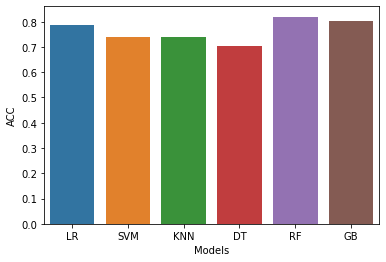

In [100]:
sns.barplot(final_data["Models"], final_data["ACC"])

In [9]:
x=data.drop("target", axis=1)
y=data["target"]

In [10]:
x.shape

(302, 13)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

# Prediction on New Data

In [13]:
import pandas as pd

In [14]:
new_data=pd.DataFrame({
    "age":52,
    "sex":1,
    "cp":0,
    "trestbps":125,
    "chol":212,
    "fbs":0,
    "restecg":1,
    "thalach":168,
    "exang":0,
    "oldpeak":1.0,
    "slope":2,
    "ca":2,
    "thal":3
},index=[0])

In [15]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [16]:
p=rf.predict(new_data)
p

array([0], dtype=int64)

In [17]:
p=rf.predict(new_data)
if p[0]==0:
    print("No disease")
else:
    print("Disease")

No disease


# Save Model using Joblib

In [18]:
import joblib

In [19]:
joblib.dump(rf,"model_joblib_heart")

['model_joblib_heart']

In [20]:
model=joblib.load("model_joblib_heart")

In [21]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [26]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e1.get())
    p3=int(e1.get())
    p4=int(e1.get())
    p5=int(e1.get())
    p6=int(e1.get())
    p7=int(e1.get())
    p8=int(e1.get())
    p9=int(e1.get())
    p10=int(e1.get())
    p11=int(e1.get())
    p12=int(e1.get())
    p13=int(e1.get())
    model=joblib.load("model_joblib_heart")
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result==0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
        
master=Tk()
master.title("Heart Diseases Prediction System")

label=Label(master, text="Heart Diseases Prediction System",
           bg="black",fg="white"). \
            grid(row=0,columnspan=2)

Label(master, text="Enter your age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text="Predict", command=show_entry_fields).grid()
mainloop()




C:\Users\Yash Agarwal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\Yash Agarwal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
